## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Importing and Merging Data

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

In [2]:
pima_diabetes_data = pd.read_csv('pima_indian_diabetes.csv')

In [3]:
pima_diabetes_data.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,1,89,66,23,94,28.1,21,0
1,0,137,40,35,168,43.1,33,1
2,3,78,50,32,88,31.0,26,1
3,2,197,70,45,543,30.5,53,1
4,1,189,60,23,846,30.1,59,1


In [4]:
pima_diabetes_dict = pd.read_csv('pima_indian_diabetes_data_dictionary.csv')

In [9]:
pima_diabetes_data.shape

(392, 8)

In [10]:
pima_diabetes_data.describe()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,81.000000,1.000000


In [11]:
pima_diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
No_Times_Pregnant    392 non-null int64
Plasma_Glucose       392 non-null int64
Diastolic_BP         392 non-null int64
Triceps              392 non-null int64
Insulin              392 non-null int64
BMI                  392 non-null float64
Age                  392 non-null int64
Diabetes             392 non-null int64
dtypes: float64(1), int64(7)
memory usage: 24.6 KB


In [13]:
pima_diabetes_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,36.000000,1.000000
90%,8.000000,170.900000,86.000000,43.000000,292.800000,42.070000,46.000000,1.000000
95%,10.000000,181.000000,90.000000,46.450000,396.500000,45.245000,52.450000,1.000000
99%,13.000000,196.000000,102.360000,52.000000,580.890000,53.362000,60.000000,1.000000


In [14]:
# Adding up the missing values (column-wise)
pima_diabetes_data.isnull().sum()

No_Times_Pregnant    0
Plasma_Glucose       0
Diastolic_BP         0
Triceps              0
Insulin              0
BMI                  0
Age                  0
Diabetes             0
dtype: int64

In [15]:
# Checking the percentage of missing values
round(100*(pima_diabetes_data.isnull().sum()/len(pima_diabetes_data.index)), 2)

No_Times_Pregnant    0.0
Plasma_Glucose       0.0
Diastolic_BP         0.0
Triceps              0.0
Insulin              0.0
BMI                  0.0
Age                  0.0
Diabetes             0.0
dtype: float64

### Feature Standardisation

In [17]:
normalized_df=(pima_diabetes_data-pima_diabetes_data.mean())/pima_diabetes_data.std()

In [18]:
normalized_df.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,-0.716511,-1.089653,-0.373178,-0.584363,-0.522175,-0.709514,-0.967063,-0.703504
1,-1.027899,0.465719,-2.453828,0.556709,0.100502,1.424909,0.209318,1.417831
2,-0.093734,-1.446093,-1.653578,0.271441,-0.572662,-0.296859,-0.476904,1.417831
3,-0.405123,2.409934,-0.053078,1.507603,3.255961,-0.368007,2.169953,1.417831
4,-0.716511,2.150705,-0.853328,-0.584363,5.805571,-0.424924,2.758143,1.417831


In [21]:
normalized_df.median()

No_Times_Pregnant   -0.405123
Plasma_Glucose      -0.117546
Diastolic_BP        -0.053078
Triceps             -0.013827
Insulin             -0.257116
BMI                  0.016190
Age                 -0.378873
Diabetes            -0.703504
dtype: float64

## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Putting feature variable to X
X = pima_diabetes_data.drop(['Diabetes'],axis=1)

# Putting response variable to y
y = pima_diabetes_data['Diabetes']

In [25]:
X.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age
0,1,89,66,23,94,28.1,21
1,0,137,40,35,168,43.1,33
2,3,78,50,32,88,31.0,26
3,2,197,70,45,543,30.5,53
4,1,189,60,23,846,30.1,59


In [26]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Running Your First Training Model

In [27]:
import statsmodels.api as sm

/home/chandan/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [28]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

/home/chandan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Diabetes   No. Observations:                  274
Model:                            GLM   Df Residuals:                      266
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -122.11
Date:                Wed, 29 Apr 2020   Deviance:                       244.22
Time:                        16:32:27   Pearson chi2:                     264.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -9.3241      1.366     -6.824      0.000     -12.002      -6.646
No_Times_Pregnant     0.0916      0.066      1.386      0.166      -0.038       0.221
Plasma_Glucose        0.0409      0.007      5.851      0.000       0.027       0.055
Diastolic_BP         -0.0060      0.014     -0.429      0.668      -0.034       0.022
Triceps               0.0129      0.019      0.668      0.504      -0.025       0.051
Insulin              -0.0011      0.001     -0.728      0.467      -0.004       0.002
BMI                   0.0647      0.030      2.151      0.031       0.006       0.124
Age                   0.0368      0.023      1.624      0.104      -0.008       0.081
=====================================================================================
"""

### Correlation Matrix

In [29]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

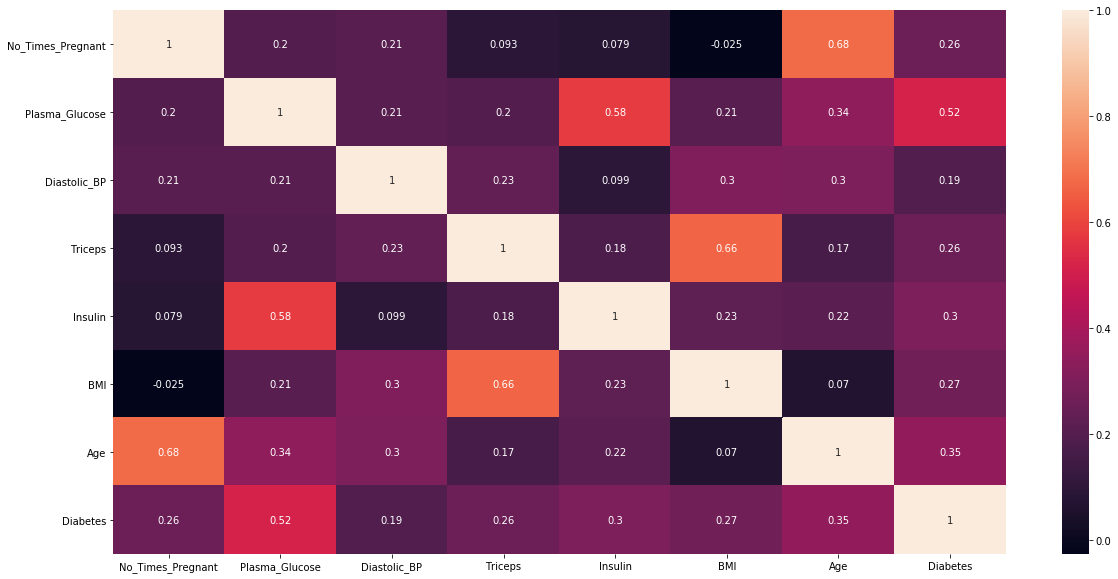

In [30]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(pima_diabetes_data.corr(),annot = True)

### Feature Selection Using RFE

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 5)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True  True  True  True False  True False]
[1 1 1 1 3 1 2]


/home/chandan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/chandan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/chandan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
X.drop(X.columns[np.where(rfe.support_ == False)[0]], axis=1, inplace=True)

In [45]:
col = X.columns.values

In [46]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

/home/chandan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4.fit().summary()

/home/chandan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Diabetes   No. Observations:                  274
Model:                            GLM   Df Residuals:                      268
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -123.63
Date:                Wed, 29 Apr 2020   Deviance:                       247.27
Time:                        16:41:24   Pearson chi2:                     263.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -8.7133      1.279     -6.810      0.000     -11.221      -6.206
No_Times_Pregnant     0.1612      0.050      3.194      0.001       0.062       0.260
Plasma_Glucose        0.0400      0.006      6.807      0.000       0.028       0.052
Diastolic_BP         -0.0002      0.014     -0.015      0.988      -0.027       0.027
Triceps               0.0179      0.019      0.937      0.349      -0.019       0.055
BMI                   0.0549      0.029      1.885      0.059      -0.002       0.112
=====================================================================================
"""

In [48]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

### Dropping Variable with high VIF

In [152]:
col = ['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [153]:
logm5 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2025.8
Date:                Thu, 01 Mar 2018   Deviance:                       4051.5
Time:                        14:21:20   Pearson chi2:                 6.00e+03
No. Iterations:                     7                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.1915      0.138     -8.607      0.000      -1.463      -0.920
PaperlessBilling                   0.3563      0.089      3.998      0.000       0.182       0.531
Contract_One year                 -0.6965      0.127     -5.483      0.000      -0.945      -0.448
Contract_Two year                 -1.3078      0.210     -6.230      0.000      -1.719      -0.896
PaymentMethod_Electronic check     0.3700      0.082      4.487      0.000       0.208       0.532
MultipleLines_No                  -0.2990      0.087     -3.442      0.001      -0.469      -0.129
InternetService_Fiber optic        0.7227      0.108      6.666      0.000       0.510       0.935
InternetService_No                -1.2732      0.175     -7.276      0.000      -1.616      -0.930
OnlineSecurity_Yes                -0.4100      0.102     -4.025      0.000      -0.610      -0.210
TechSupport_Yes                   -0.4202      0.101     -4.157      0.000      -0.618      -0.222
StreamingMovies_No                -0.2205      0.093     -2.366      0.018      -0.403      -0.038
tenure                            -1.4276      0.177     -8.066      0.000      -1.774      -1.081
TotalCharges                       0.6495      0.179      3.622      0.000       0.298       1.001
==================================================================================================
"""

In [154]:
# Calculating Vif value
vif_cal(input_data=telecom.drop(['customerID','PhoneService','SeniorCitizen', 'Partner', 'Dependents',
                                 'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check',
                                 'gender_Male','MultipleLines_Yes','OnlineSecurity_No','OnlineBackup_No',
                                 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
                                 'TechSupport_No','StreamingTV_No','StreamingTV_Yes','StreamingMovies_Yes',
                                 'MonthlyCharges'], axis=1), dependent_col='Churn')

,Var,Vif
11,TotalCharges,8.24
10,tenure,6.56
0,PaperlessBilling,2.44
6,InternetService_No,0.45
2,Contract_Two year,0.26
8,TechSupport_Yes,0.24
1,Contract_One year,0.23
7,OnlineSecurity_Yes,0.21
9,StreamingMovies_No,0.17
3,PaymentMethod_Electronic check,0.05


In [155]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Making Predictions

In [156]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])

In [157]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [158]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [159]:
# Let's see the head
y_pred_1.head()

,1
0,0.499083
1,0.372696
2,0.006738
3,0.635453
4,0.007533


In [160]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [161]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [162]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [163]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [164]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [165]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)

In [166]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.499083
1,3730,1,0.372696
2,1761,0,0.006738
3,2283,1,0.635453
4,1872,0,0.007533


In [167]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [168]:
# Let's see the head
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,942,0,0.499083,0
1,3730,1,0.372696,0
2,1761,0,0.006738,0
3,2283,1,0.635453,1
4,1872,0,0.007533,0


### Model Evaluation

In [169]:
from sklearn import metrics

In [170]:
help(metrics.confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics.classification:

confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
    Compute confusion matrix to evaluate the accuracy of a classification
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` but
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (correct) target values.
    
    y_pred : array, shape = [n_samples]
        Estimated targets as returned by a classifier.
    
    labels : array, shape = [n_classes], optional
        List of labels to index the m

In [171]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[1362,  166],
       [ 249,  333]], dtype=int64)

In [172]:
# Predicted     not_churn    churn
# Actual
# not_churn        1326      166
# churn            249       333  

In [173]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.predicted)

0.80331753554502372

In [174]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [175]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.84543761638733705

In [176]:
# Let us calculate specificity
TN / float(TN+FP)

0.66733466933867736

In [177]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.332665330661


In [178]:
# positive predictive value 
print (TP / float(TP+FP))

0.891361256545


In [179]:
# Negative predictive value
print (TN / float(TN+ FN))

0.572164948454


### ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [180]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

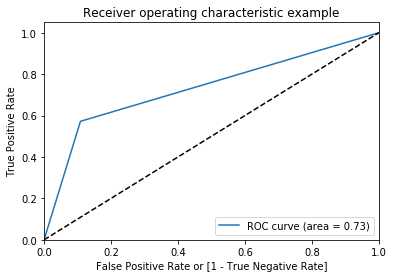

(array([ 0.        ,  0.10863874,  1.        ]),
 array([ 0.        ,  0.57216495,  1.        ]),
 array([2, 1, 0], dtype=int64))

In [181]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [182]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,942,0,0.499083,0,1,1,1,1,1,0,0,0,0,0
1,3730,1,0.372696,0,1,1,1,1,0,0,0,0,0,0
2,1761,0,0.006738,0,1,0,0,0,0,0,0,0,0,0
3,2283,1,0.635453,1,1,1,1,1,1,1,1,0,0,0
4,1872,0,0.007533,0,1,0,0,0,0,0,0,0,0,0


In [183]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.275829  0.000000  1.000000
0.1   0.1  0.605687  0.477094  0.943299
0.2   0.2  0.695261  0.643325  0.831615
0.3   0.3  0.750237  0.752618  0.743986
0.4   0.4  0.783886  0.828534  0.666667
0.5   0.5  0.803318  0.891361  0.572165
0.6   0.6  0.795735  0.941754  0.412371
0.7   0.7  0.757820  0.978403  0.178694
0.8   0.8  0.727962  1.000000  0.013746
0.9   0.9  0.724171  1.000000  0.000000


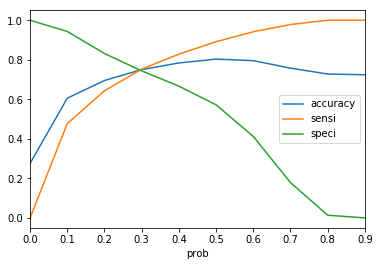

In [184]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [185]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

In [186]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,942,0,0.499083,0,1,1,1,1,1,0,0,0,0,0,1
1,3730,1,0.372696,0,1,1,1,1,0,0,0,0,0,0,1
2,1761,0,0.006738,0,1,0,0,0,0,0,0,0,0,0,0
3,2283,1,0.635453,1,1,1,1,1,1,1,1,0,0,0,1
4,1872,0,0.007533,0,1,0,0,0,0,0,0,0,0,0,0


In [187]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.final_predicted)

0.75023696682464458

In [188]:
metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.final_predicted )

array([[1150,  378],
       [ 149,  433]], dtype=int64)